<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

In [2]:
import tensorflow as tf
print (tf.__version__)

2.7.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
from tensorflow.keras.applications import ResNet50, VGG16


In [6]:
from tensorflow.keras.applications.vgg16 import preprocess_input


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [8]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2021-11-28 18:38:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip.1’

concrete_data_week4 100%[===================>] 249.37M  35.8MB/s    in 7.3s    

2021-11-28 18:38:30 (34.2 MB/s) - ‘concrete_data_week4.zip.1’ saved [261483817/261483817]



In [ ]:
!unzip concrete_data_week4.zip

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [10]:
image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [11]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_generator = data_generator.flow_from_directory(
    '/content/concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [13]:
valid_generator = data_generator.flow_from_directory(
    '/content/concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


In [51]:
model=Sequential()

In [52]:
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

In [53]:
model.add(Dense(2, activation='softmax'))

In [54]:
model.layers[0].trainable = False

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [56]:
model.compile(loss= 'categorical_crossentropy' , 
              optimizer='adam', 
              metrics =['accuracy'])

In [57]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(valid_generator)
num_epochs = 2

Update July 2021: For TensorFlow 2.2+ users, just use the .fit method for your projects. The .fit_generator method will be deprecated in future releases of TensorFlow as the .fit method can automatically detect if the input data is an array or a generator.

In [58]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/2
301/301 [==============================] - 306s 1s/step - loss: 0.1122 - accuracy: 0.9620 - val_loss: 0.0263 - val_accuracy: 0.9944
Epoch 2/2
301/301 [==============================] - 305s 1s/step - loss: 0.0202 - accuracy: 0.9956 - val_loss: 0.0155 - val_accuracy: 0.9962


In [18]:
model.save('vgg.h5')

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [59]:
resnet=tf.keras.models.load_model('/content/classifier_resnet_model.h5')

In [60]:
test_generator = data_generator.flow_from_directory(
    '/content/concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    shuffle=False)

Found 500 images belonging to 2 classes.


performance of the classifier using the VGG16

In [61]:
score_vgg = model.evaluate_generator(test_generator)

print(score_vgg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.014470823109149933, 0.9959999918937683]


performance of the classifier using the ResNet

In [62]:
score_resnet = resnet.evaluate_generator(test_generator)

print(score_resnet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.002295577432960272, 1.0]


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [24]:
import matplotlib.pyplot as plt
import numpy as np


Display the 5 first images from Test_generator

In [29]:
first_batch=test_generator.next()

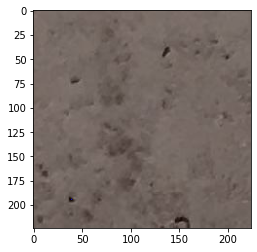

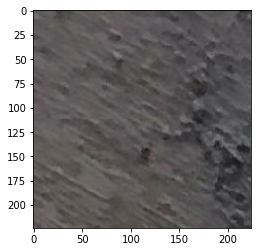

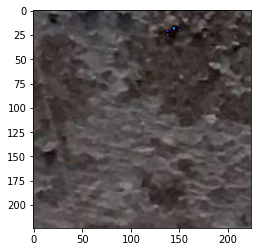

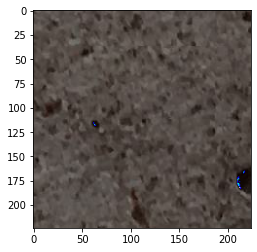

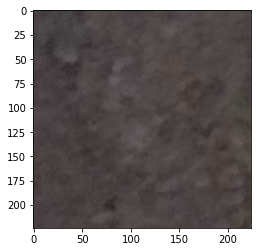

In [30]:
for i in range(5):
  image=first_batch[0][i].astype(np.uint8)
  plt.imshow(image)
  plt.show()

In [31]:
pred_vgg=model.predict_generator(test_generator)
pred_resnet=resnet.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [32]:
pred_vgg[:5]

array([[0.513474  , 0.48652598],
       [0.513474  , 0.48652598],
       [0.513474  , 0.48652598],
       [0.513474  , 0.48652598],
       [0.513474  , 0.48652598]], dtype=float32)

In [33]:
pred_resnet[:5]
          

array([[9.9921405e-01, 7.8594941e-04],
       [9.9270529e-01, 7.2947037e-03],
       [9.9622810e-01, 3.7718944e-03],
       [9.9762148e-01, 2.3784833e-03],
       [9.9910682e-01, 8.9321076e-04]], dtype=float32)

In [34]:
#Prediction for VGG16
for i in pred_vgg[:5]:
  if i[0]>=0.5:
    print('negative')
  else:
    print('positive')

negative
negative
negative
negative
negative


In [35]:
#Prediction for REsnet
for i in pred_resnet[:5]:
  if i[0]>=0.5:
    print('negative')
  else:
    print('positive')

negative
negative
negative
negative
negative


### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).